In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os
import ssl
import urllib
import csv
import numpy as np

sys.path.append('../')
from vis.utils.io import is_number

ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv'
response = urllib.request.urlopen(url)
lines = [l.decode('utf-8') for l in response.readlines()]
cr = csv.reader(lines)

array = []
for row in cr:
    array.append([float(v) if is_number(v) else v for v in row])
array = np.array(array, dtype=object)

column_labels = array[0]
print(column_labels)

row_labels = array[:,-1]
print(row_labels[0:10])

data = array[1:,:]
print(data[0:10])

['SepalLength' 'SepalWidth' 'PetalLength' 'PetalWidth' 'Name']
['Name' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']]


In [2]:
import matplotlib.colors as mc
import matplotlib.cm as cm

# column labels
Lc = column_labels[:-1]
print(Lc)

# row labels
Lr = np.unique(row_labels)[0:-1]
print(Lr)

# data
F = np.array(data, copy=True)
print(F[0:10])

# partition data into three parts
F0 = F[F[:,-1] == Lr[0]][:,:-1]
F1 = F[F[:,-1] == Lr[1]][:,:-1]
F2 = F[F[:,-1] == Lr[2]][:,:-1]

# line labels
Ll0 = np.array([Lr[0] for _ in range(F0.shape[0])])
Ll1 = np.array([Lr[1] for _ in range(F1.shape[0])])
Ll2 = np.array([Lr[2] for _ in range(F2.shape[0])])

# line colors
Cl0 = np.array([mc.to_rgba(cm.spring(v * 1.0), 1.0) for v in np.arange(0,1,1/F0.shape[0])])
Cl1 = np.array([mc.to_rgba(cm.summer(v * 2.0), 0.5) for v in np.arange(0,1,1/F1.shape[0])])
Cl2 = np.array([mc.to_rgba(cm.winter(v * 3.0), 0.25) for v in np.arange(0,1,1/F2.shape[0])])

# merge all data
G = np.row_stack((F0, F1, F2))
C = np.row_stack((Cl0, Cl1, Cl2))
Ll = np.hstack((Ll0, Ll1, Ll2))

['SepalLength' 'SepalWidth' 'PetalLength' 'PetalWidth']
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [5.4 3.9 1.7 0.4 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']]


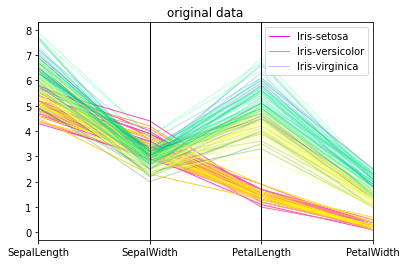

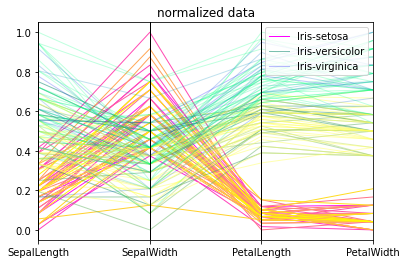

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

sys.path.append('../')
from vis.plotting import pcp

ax = plt.figure().gca()
pcp.plot(G, ax=ax, c=C, lw=1.00, xtick_labels=Lc, line_labels=Ll, title='original data')
plt.show()

ax = plt.figure().gca()
pcp.plot(G, ax=ax, c=C, lw=1.00, xtick_labels=Lc, line_labels=Ll, normalized=True, title='normalized data')
plt.show()

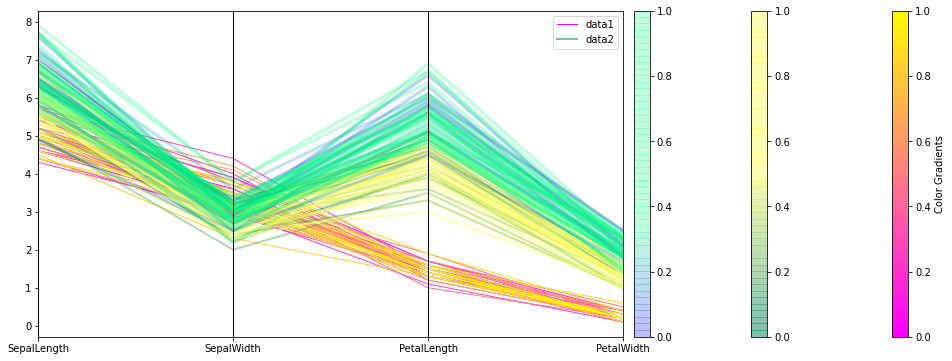

In [12]:
%matplotlib inline

# line labels
Ll0 = np.array(['data1' for _ in range(F0.shape[0])])
Ll1 = np.array(['data2' for _ in range(F1.shape[0])])
Ll2 = np.array(['data3' for _ in range(F2.shape[0])])

# line colors
d0,d1,d2 = 1/F0.shape[0], 1/F1.shape[0], 1/F2.shape[0]
Cl0 = np.array([mc.to_rgba(cm.spring(v), 1.0) for v in np.arange(0,1,d0)])
Cl1 = np.array([mc.to_rgba(cm.summer(v * 2.0), 0.5) for v in np.arange(0,1,d1)])
Cl2 = np.array([mc.to_rgba(cm.winter(v * 3.0), 0.25) for v in np.arange(0,1,d2)])

# colorbar gradients
Cg0 = np.arange(0,1+d0,d0)
Cg1 = np.arange(0,1+d1,d1)
Cg2 = np.arange(0,1+d2,d2)

fig = plt.figure()
w,h = fig.get_size_inches()
fig.set_size_inches(w * 3, h * 1.5)
ax = fig.gca()

pcp.plot(F0, ax=ax, c=Cl0, lw=1.00, xtick_labels=Lc, line_labels=Ll0, \
     show_colorbar=True, cbar_grad=Cg0, cbar_label='Color Gradients')
pcp.plot(F1, ax=ax, c=Cl1, lw=2.00, xtick_labels=Lc, line_labels=Ll1, show_colorbar=True, cbar_grad=Cg1)
pcp.plot(F2, ax=ax, c=Cl2, lw=3.00, xtick_labels=Lc, show_colorbar=True, cbar_grad=Cg2)

plt.show()